In [1]:
import copy
import time 
import torch
import sys, os
import numpy as np
import numpy.linalg as LA
from os.path import abspath, join, dirname, expanduser

sys.path.append(join(os.getcwd(), ".."))

from utils import *
from visuals import *
from pde_solvers import *

from scipy.io import savemat
from datetime import datetime 

import matplotlib 
%matplotlib inline 
import matplotlib.pyplot as plt 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/lex/anaconda3/envs/38/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
data_dir="/opt/SoRoPD"
_labelsize=18

fname: 091323_21_31_09_grav_7pcs_2.5N_PD.npz, strain_goal(q^d): 0.45
num_pieces: 7 num_sections: 41, drag: False, cable: False
runtime: 2595.6662 mins or  43.2611 hours.
controller: PD | Kp: 5.5 | Kd: 4.5 | tip_load: 2.5


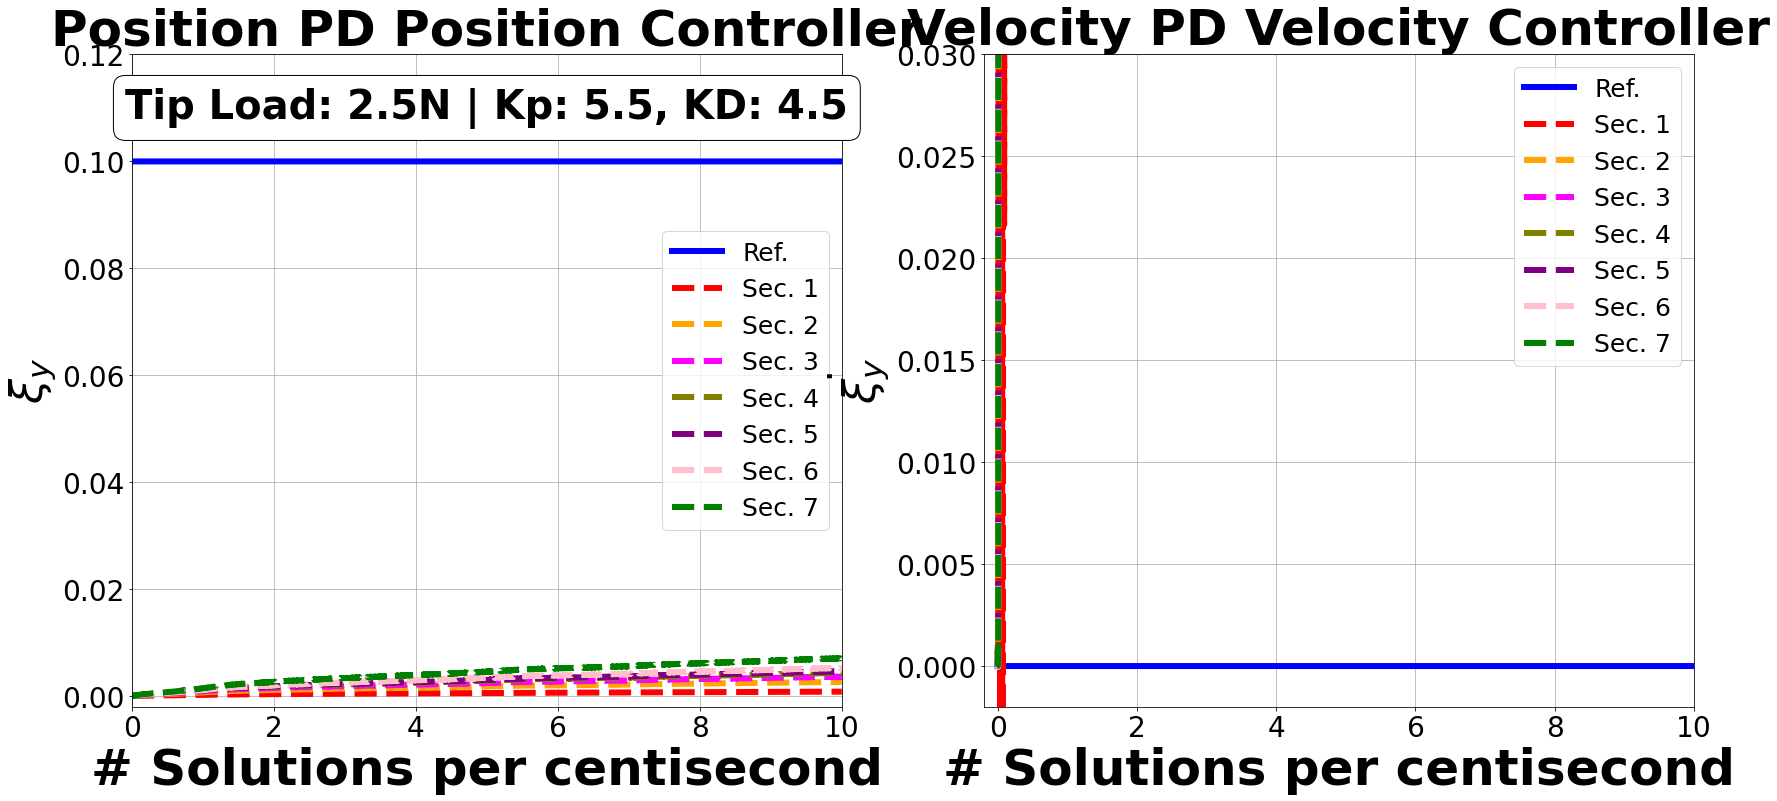

In [4]:
fname="091323_21_31_09_grav_7pcs_2.5N_PD.npz"
bundle = load_file(fname, data_dir)


# calculate time from position:: 0.1 sin^{-1}(\xi_y)
t_pos = 0.1
qbatch, plt_idx = bundle.qbatch, 4

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)

plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'Position {bundle.controller} Position Controller', plot_type="pos", lw=6,
                 plt_idx=plt_idx, ylabel=r'${{\xi_{y} }}$', xlim=(-0.005, 10), ylim=[-0.002, 0.12], annotate=True, xy_pos=(5, 0.11),
                  plt_len=len(qbatch),
                )

plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'Velocity {bundle.controller} Velocity Controller', plot_type="vel", 
                plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.200, 10), annotate=False,
                ylim=[-.002, 0.03], lw=6, xy_pos=(25, 0.023), save=False, savename=None)

plt.show() 

In [5]:

# fname="091323_17_18_12_drag_3pcs_5.0N_PD.npz" # Audrey 07:00am, Septenber 14 trained 
fname ="091423_10_51_38_drag_cable_grav_10pcs_1.0N_PD.npz" # Lekan Dell 09/13 Afternoon
bundle = load_file(fname, data_dir="/opt/SoRoPD/")
bundle.tsol.shape 


# # calculate time from position:: 0.1 sin^{-1}(\xi_y)
# t_pos = 0.1
# qbatch, plt_idx = bundle.qbatch, 4

# fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)

# plot_axis_strains(ax1, bundle, 0.5, _labelsize=18, title=f'Position {bundle.controller} Position Controller', plot_type="pos", lw=6,
#                  plt_idx=plt_idx, ylabel=r'${{\xi_{y} }}$', xlim=(-0.002, 10), ylim=[-0.002, 1], annotate=True, xy_pos=(5, 0.11),
#                   plt_len=len(qbatch),
#                 )

# plot_axis_strains(ax2, bundle, 0.0, _labelsize=18, title=f'Velocity {bundle.controller} Velocity Controller', plot_type="vel", 
#                 plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.200, 10), annotate=False,
#                 ylim=[-.002, 1], lw=6, xy_pos=(25, 0.8), save=True)

# plt.show() 

fname: 091423_10_51_38_drag_cable_grav_10pcs_1.0N_PD.npz, strain_goal(q^d): 0.5
num_pieces: 10 num_sections: 41, drag: True, cable: True
runtime: 296.4235 mins or  4.9404 hours.
controller: PD | Kp: 2.5 | Kd: 5.3 | tip_load: 1.0


(8101, 1)

fname: 072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: True
runtime: 3513.3881 mins or  58.5565 hours.
controller: PD | Kp: 4.0 | Kd: 5.5 | tip_load: 10
savename: 072423_with_cable_4_pieces_tipload.10N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


fname: 072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: True, cable: False
runtime: 661.5728 mins or  11.0262 hours.
controller: PD | Kp: 4.0 | Kd: 0.5 | tip_load: 10
savename: 072723_with_drag_4_pieces_tipload.10N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


fname: 072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: False
runtime: 277.4110 mins or  4.6235 hours.
controller: PD | Kp: 3.5 | Kd: 0.34 | tip_load: 10
savename: 072423_4_pieces_tipload.10N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


fname: 090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: 0, cable: 1
runtime: 3856.9614 mins or  64.2827 hours.
controller: PD | Kp: 50.0 | Kd: 5.42 | tip_load: 0.2
savename: 090623_with_cable_10_pieces_tipload.0.2N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


fname: 091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: 0, cable: 1
runtime: 3087.4334 mins or  51.4572 hours.
controller: PD | Kp: 1.5 | Kd: 5.8 | tip_load: 1.0
savename: 091023_with_cable_10_pieces_tipload.1.0N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


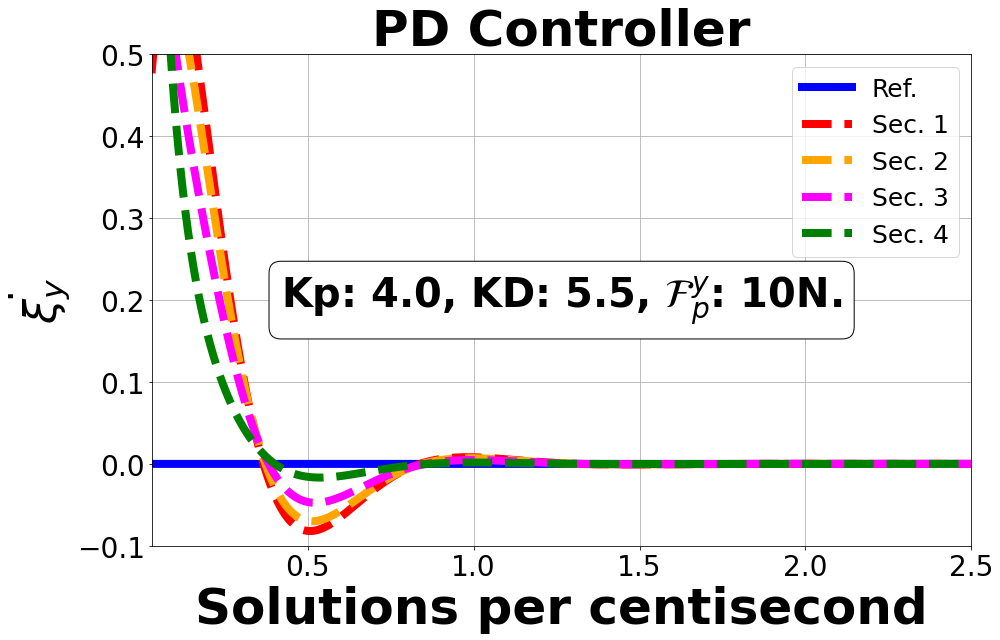

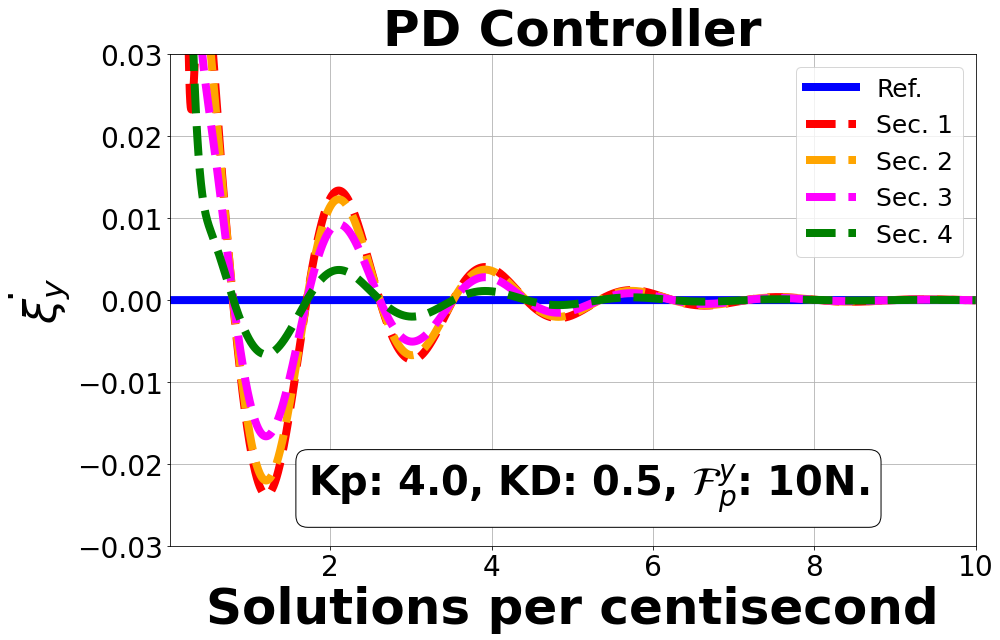

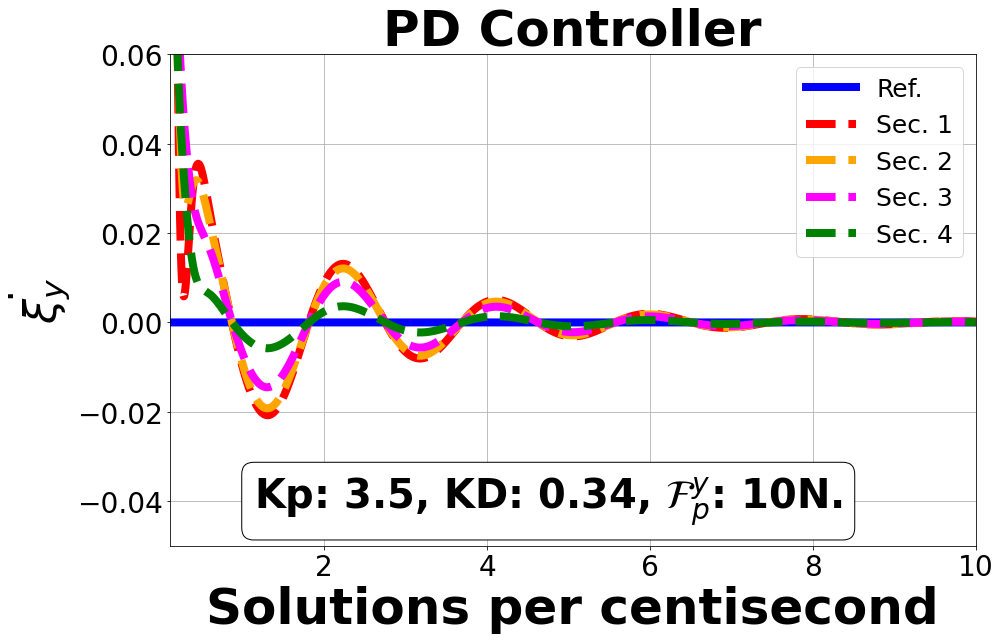

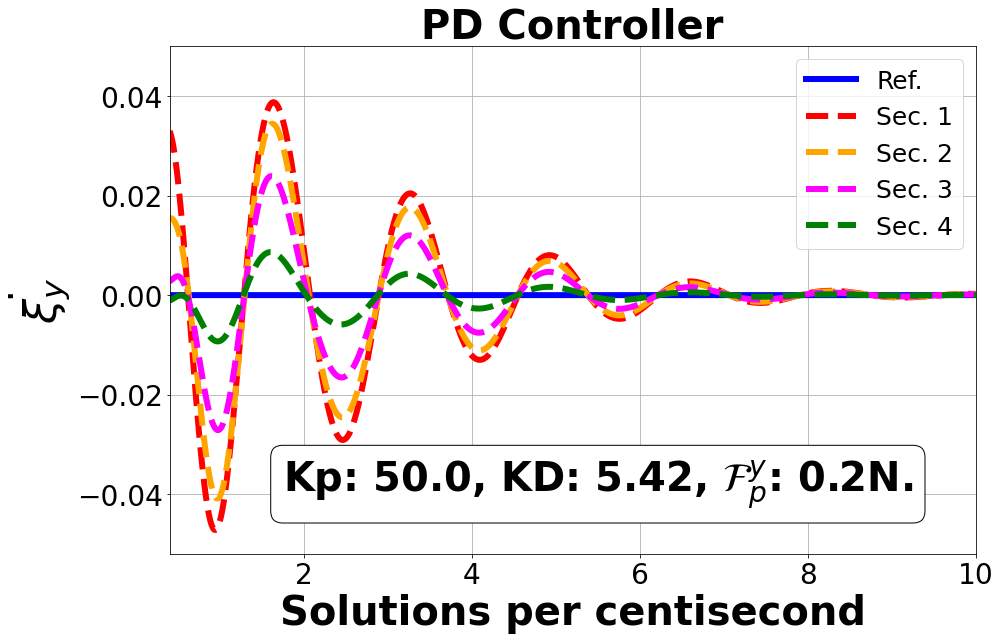

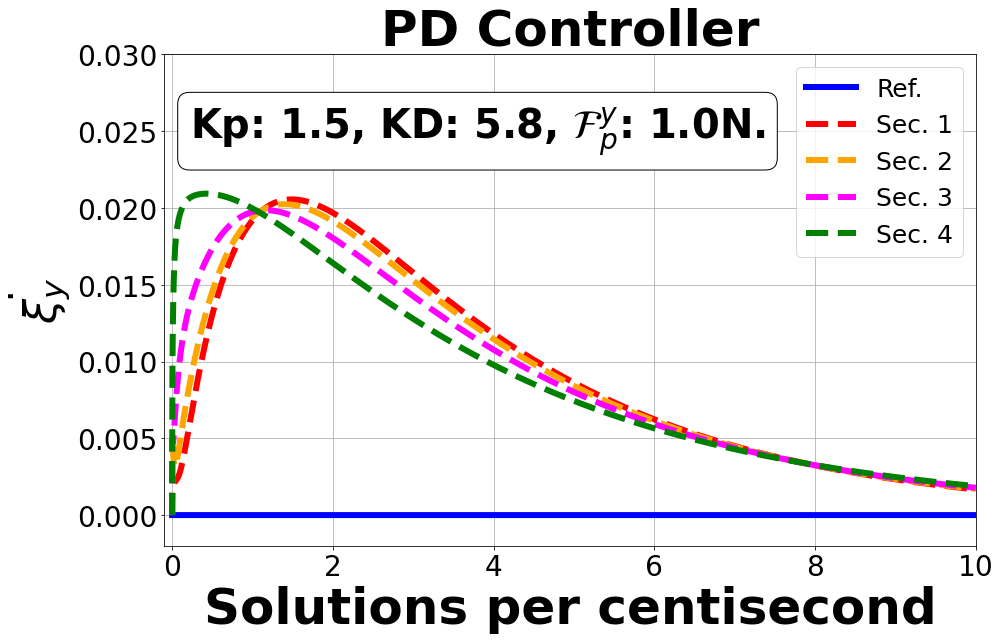

In [15]:

_fontdict = {'fontsize':34, 'fontweight':'bold'}

def get_fig_ax():
    fig = plt.figure(figsize=(14,9)); 
    ax = fig.add_subplot(1, 1, 1)

    return ax 

def do_plot(data_dir="/opt/SoRoPD.bak/", _labelsize=18):
    # plt.ion()

    ax = get_fig_ax()
    fname = "072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, plot_type="vel", \
                    title=f'{bundle.controller} Controller', lw=8, annotate=True, xy_pos=None, \
                    ylabel=r'${{ \dot {{\xi_{y} }} }}$',  ylim=(-0.1, 0.5), xlim=(0.03, 2.50), save=True)

    ax = get_fig_ax()
    fname = "072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Controller', plot_type="vel", lw=8, \
                annotate=True, xy_pos=(5.2, -0.023), ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.01, 10.00), \
                ylim=[-0.03, 0.03], plt_len=10000, save=True)

    ax = get_fig_ax()
    fname = "072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Controller', plot_type="vel", annotate=True,
                 lw=8, ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.100, 10), ylim=[-0.05, 0.06], plt_len=10000, 
                 save=True, xy_pos=(4.75, -0.04))
    
    ax = get_fig_ax()
    fname = "090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Controller', plot_type="vel", annotate=True,
                 xy_pos=(5.5, -0.038), 
                plt_idx=3, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(0.400, 10.000), ylim=[-0.052, 0.05], lw=6, 
                 _fontdict = {'fontsize':40, 'fontweight':'bold'}, save=True)

    ax = get_fig_ax()
    fname="091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    qbatch, plt_idx = bundle.qbatch, 5
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Controller', plot_type="vel", 
                plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.1, 10), annotate=True,
                ylim=[-.002, 0.03], lw=6, xy_pos=(3.8, 0.025), save=True)                 

do_plot()                